## 5.4.1 곱셈 계층
문제 1. 현빈 군은 슈퍼에서 1개에 100원인 사과를 2개 샀습니다. 이때 지불 금액을 구하세요. 단, 소비세가 10% 부과됩니다.

계산 그래프:

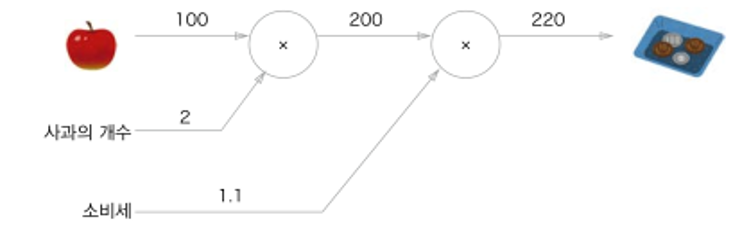

In [4]:
from IPython.display import Image
Image("ch05_1.png")


역전파를 활용한 미분 계산:

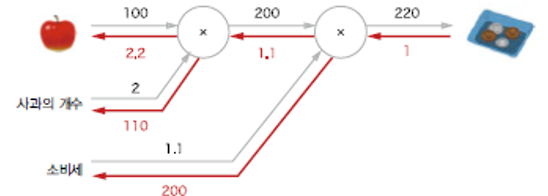

In [3]:
Image("ch05_2.png")

In [5]:
# layer_naive.py
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y  # 곱셈 연산                      
        out = x * y # 출력 반환

        return out

    def backward(self, dout):
        dx = dout * self.y  # x와 y를 바꾼다.    # x에 대한 미분
        dy = dout * self.x # y에 대한 미분

        return dx, dy   # 두 기울기를 반환

In [6]:
# buy_apple.py
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num) # 100*2 = 200
price = mul_tax_layer.forward(apple_price, tax) #200*1.1 = 220
print("price:", int(price))

price: 220


In [7]:
# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
print("dApple:", dapple)    # 1*1.1*2 = 2.2
print("dApple_num:", int(dapple_num))   # 1*1.1*100 = 110
print("dTax:", dtax)    # 1*200

dApple: 2.2
dApple_num: 110
dTax: 200


## 5.4.2 덧셈 계층
문제 2. 현빈 군은 슈퍼에서 사과를 2개, 귤을 3개 샀습니다. 사과는 1개에 100원, 귤은 1개 150원입니다. 소비세가 10%일 때 지불 금액을 구하세요.

계산 그래프:

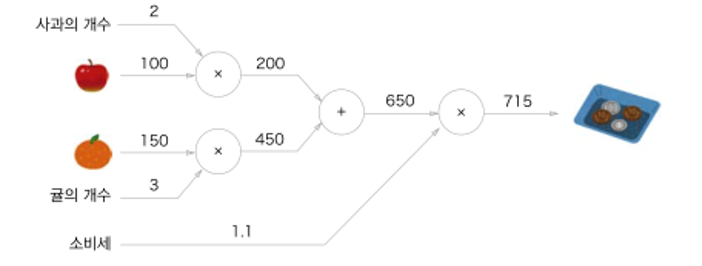

In [8]:
Image("ch05_3.png")

역전파를 이용한 미분:

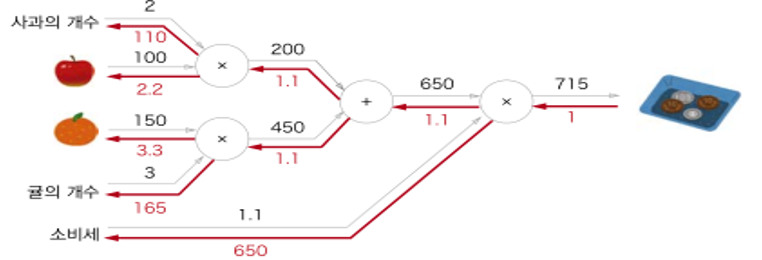

In [9]:
Image("ch05_4.png")

In [10]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

In [11]:
# buy_apple_orange.py
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward 순방향 계산
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1) 곱하기 100*2= 200
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2) 곱하기 150*3 =450
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3) 곱한거 끼리 더하기 200 + 450 =650
price = mul_tax_layer.forward(all_price, tax)  # (4) 곱하기 650*1.1 = 715
print("price:", int(price)) #가격까지 구함

price: 715


In [12]:
# backward
dprice = 1  #최종 가격 : 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4) 1.1, 650
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3) 1.1, 1.1
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2) 1.1*3= 3.3, 1.1*150= 165
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1) 1.1*2= 2.2, 1.1*100= 110

print("dApple:", dapple)    #2.2
print("dApple_num:", int(dapple_num))   #110
print("dOrange:", dorange)  #3.3
print("dOrange_num:", int(dorange_num)) #165
print("dTax:", dtax)    #650

dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650
